<a href="https://colab.research.google.com/github/Rneron/Teste/blob/main/Case_EJEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando as bibliotecas que iremos utilizar para análises gráficas e manipulação da base de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importando a base da dados e definindo as variáveis 
dados =  pd.read_csv('/content/drive/MyDrive/Python/tabelas/2019.csv')
dados = dados.rename(columns={'Overall rank':'Ranking','Country or region':'Country'})


In [4]:
dados.isna().sum() # Verificando a soma de NA

Ranking                         0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
dados.shape

(156, 9)

In [6]:
dados.info() # Verificando a tipagem das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
dados.head()

,Ranking,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
dados.describe()

,Ranking,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


***VERIFICANDO NORMALIDADE DAS VARIÁVEIS***

*   *Teste de Shapiro-Wilk*
*   *Histograma*
*   *QQ-Plot*
*   *Box-Plot*


In [9]:
import scipy.stats as stats

score = dados['Score']
pib = dados['GDP per capita']
expec = dados['Healthy life expectancy']
sup = dados['Social support']
lib= dados['Freedom to make life choices']

In [10]:
stats.shapiro(dados['GDP per capita']) 

ShapiroResult(statistic=0.9652909636497498, pvalue=0.0005821228260174394)

In [11]:
stats.shapiro(dados['Score'])

ShapiroResult(statistic=0.9872018098831177, pvalue=0.1632891297340393)

In [12]:
stats.shapiro(dados['Social support'])

ShapiroResult(statistic=0.9073690176010132, pvalue=2.1574550146397087e-08)

In [13]:
stats.shapiro(dados['Healthy life expectancy'])

ShapiroResult(statistic=0.9534121155738831, pvalue=4.4986765715293586e-05)

In [14]:
stats.shapiro(dados['Freedom to make life choices'])

ShapiroResult(statistic=0.9542983770370483, pvalue=5.385818803915754e-05)

<ipython-input-15-c2196ade6b0f>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dados.drop(columns='Ranking').hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,


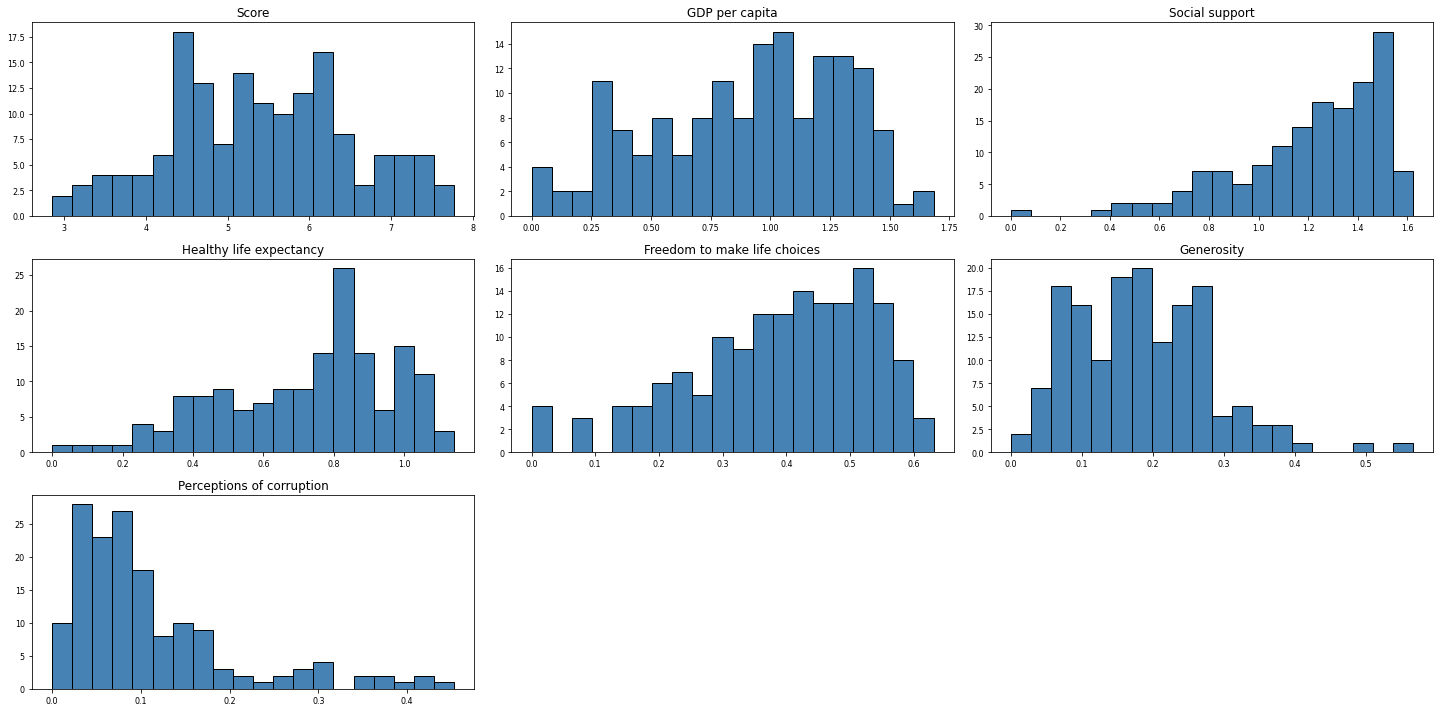

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

dados.drop(columns='Ranking').hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout() 
plt.show()


<ipython-input-16-87b3ea6454b3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


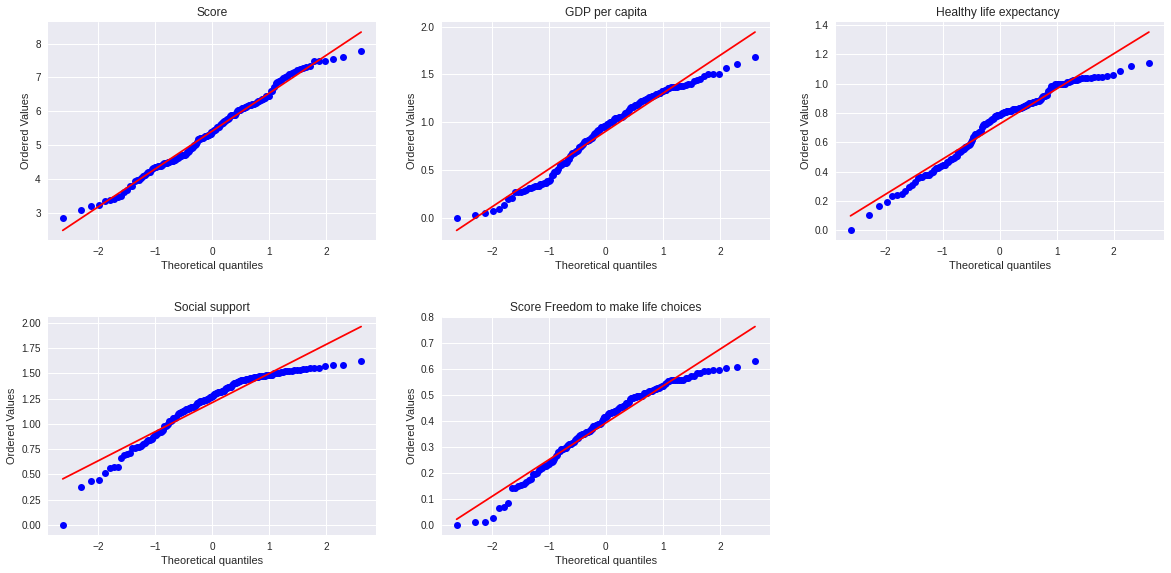

In [16]:
# QQ-plot para verificar a normalidade dos dados

plt.style.use('seaborn')
plt.figure(figsize = ((20,8)))
plt.subplot(2,3,1)
stats.probplot(score, dist="norm", plot=plt)
plt.title('Score')

plt.subplot(2,3,2)
stats.probplot(pib, dist="norm", plot=plt)
plt.title('GDP per capita')

plt.subplot(2,3,3)
stats.probplot(expec, dist="norm", plot=plt)
plt.title('Healthy life expectancy ')

plt.subplot(2,3,4)
stats.probplot(sup, dist="norm", plot=plt)
plt.title('Social support')

plt.subplot(2,3,5)
stats.probplot(lib, dist="norm", plot=plt)
plt.title('Score Freedom to make life choices')

plt.subplots_adjust(left=0.125, bottom=0.01, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.show()

<Axes: >

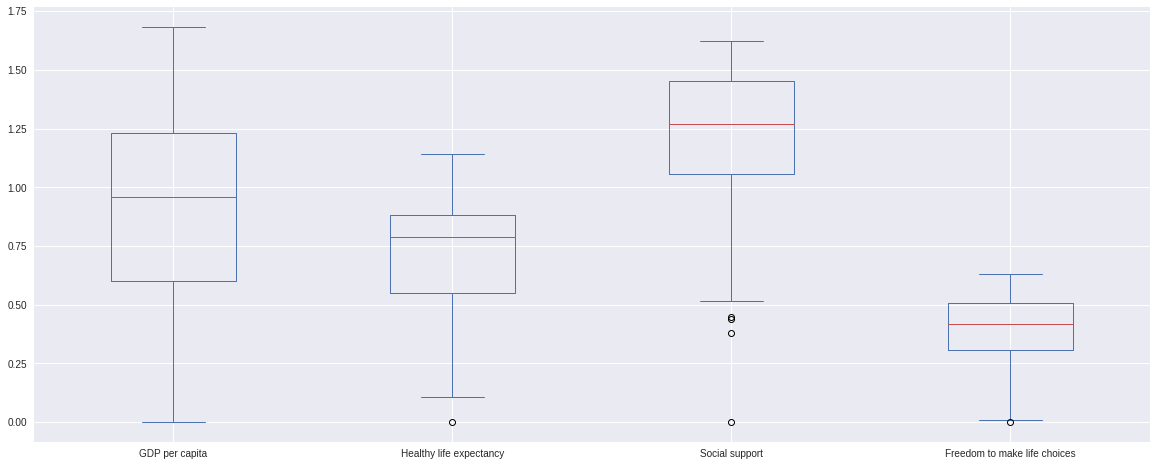

In [17]:
# Box-Plot para verifcar a existência de outliers 

dados[['GDP per capita','Healthy life expectancy','Social support','Freedom to make life choices']].plot.box(figsize=(20,8)) 

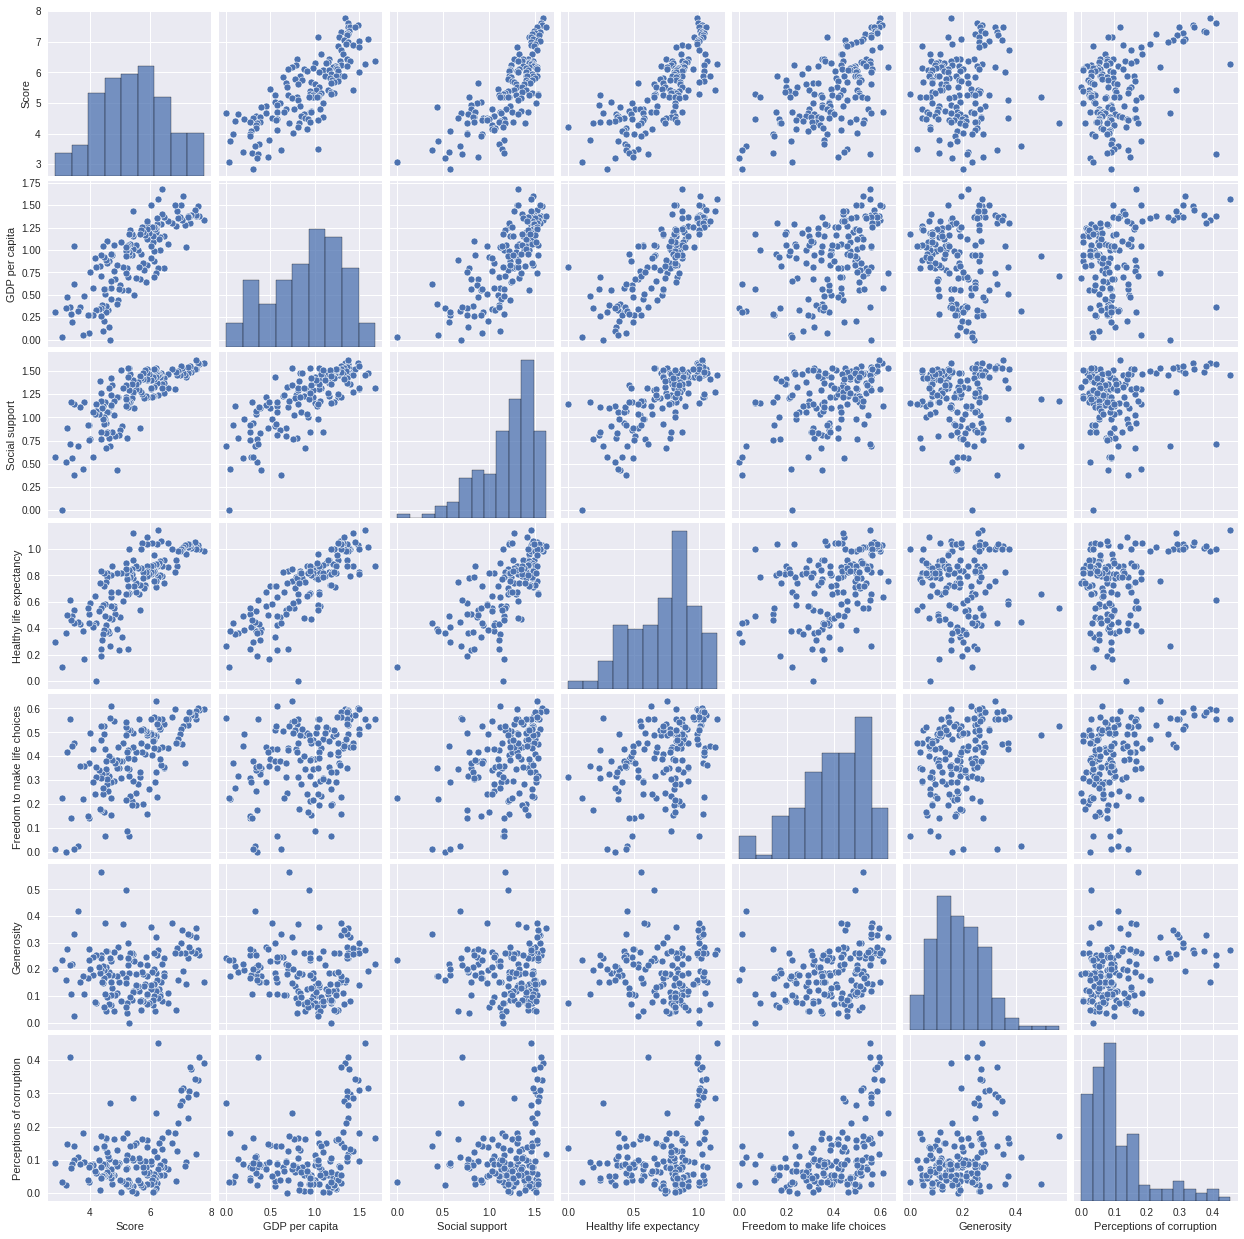

In [22]:
df = dados.drop(columns = 'Ranking') # importante para verificar as correlações
sns.pairplot(df) # Gráficos de correlações 


<Axes: >

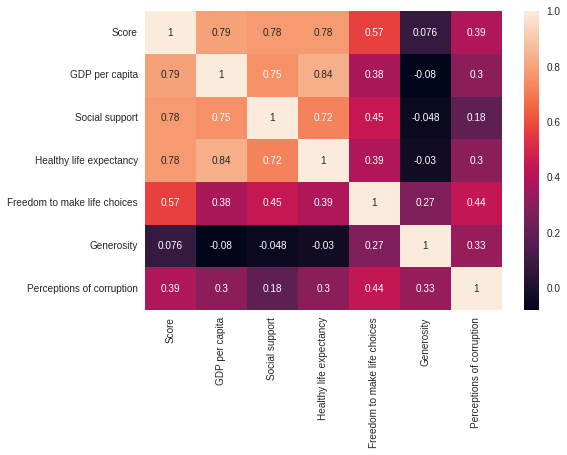

In [23]:
correlacoes = df.corr()
sns.heatmap(correlacoes, annot = True) # Mapa de calor 

In [18]:
# Identificando os outliers para a variável Healthy life expectancy

Q3 = expec.quantile(0.75) # terceiro quartil
Q1 = expec.quantile(0.25) # primeiro quartil
IQR = Q3-Q1
ls = Q3 + (1.5*IQR)
li = Q1 - (1.5*IQR)

dados.loc[(dados['Healthy life expectancy'] > ls) | (dados['Healthy life expectancy'] < li)]


,Ranking,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
134,135,Swaziland,4.212,0.811,1.149,0.0,0.313,0.074,0.135


In [19]:
# Identificando os outliers para a variável Social Support

Q3 = sup.quantile(0.75) # terceiro quartil
Q1 = sup.quantile(0.25) # primeiro quartil
IQR = Q3-Q1
ls = Q3 + (1.5*IQR)
li = Q1 - (1.5*IQR)

dados.loc[(dados['Social support'] > ls) | (dados['Social support'] < li)]

,Ranking,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
101,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [20]:
# Identificando os outliers para a variável Freedom to make life choices

Q3 = lib.quantile(0.75) # terceiro quartil
Q1 = lib.quantile(0.25) # primeiro quartil
IQR = Q3-Q1
ls = Q3 + (1.5*IQR)
li = Q1 - (1.5*IQR)

dados.loc[(dados['Freedom to make life choices'] > ls) | (dados['Freedom to make life choices'] < li)]

,Ranking,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
153,154,Afghanistan,3.203,0.35,0.517,0.361,0.0,0.158,0.025


**Como temos poucos outliers iremos simplesmente retirá-los para facilitar as análises.**

In [41]:
# Novo data frame sem os outliers 

new_df = dados.drop(labels=[134,101,144,148,154,153],axis=0)

Aplicaremos um modelo de regressão para tentar entender como cada variável afeta o GPD per Capita

In [50]:
# Importar bibliotecas

import statsmodels.formula.api as sm # Para criar a regressão linear múltipla
from yellowbrick.regressor import ResidualsPlot # Para visualização de residuais

In [52]:
new_pib = new_df['GDP per capita']
new_expec = new_df['Healthy life expectancy']
new_sup = new_df['Social support']
new_lib= new_df['Freedom to make life choices']

In [58]:
y = new_pib.values
x1 = new_sup.values
x2 = new_expec.values

Após a criação do modelo deve ser checado as suposições a respeito dos resíduos

*   Normalidade
*   Heterocedasticidade
*   Não correlacionados






In [71]:
# Criar modelo com apenas 1 variável preditora

modelo = sm.ols(formula = 'y~x1', data = new_df)
modelo = modelo.fit()
print(modelo.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           7.24e-28
Time:                        19:37:29   Log-Likelihood:                -9.2252
No. Observations:                 150   AIC:                             22.45
Df Residuals:                     148   BIC:                             28.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4575      0.104     -4.405      0.0

In [78]:
# Criar modelo com  2 variáveis preditoras

modelo2 = sm.ols(formula = 'y~x1+x2', data = new_df)
modelo2 = modelo2.fit()
print(modelo2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           8.05e-46
Time:                        19:38:53   Log-Likelihood:                 35.861
No. Observations:                 150   AIC:                            -65.72
Df Residuals:                     147   BIC:                            -56.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4265      0.077     -5.523      0.0

**Claramente o modelo com 2 variáveis independentes é melhor, entretanto para visualização iremos utilizar o modelo com apenas 1 variável.**

In [72]:
dados.head()

,Ranking,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


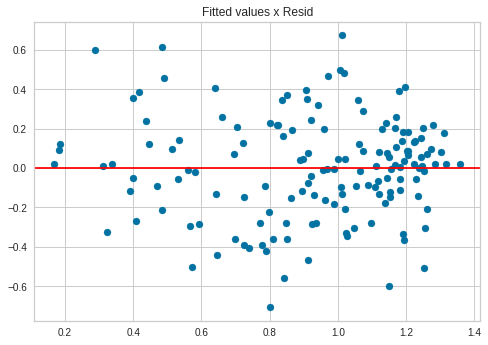

In [73]:
# Visualizar gráfico com os residuais

plt.scatter(x=modelo.fittedvalues,y=modelo.resid)
plt.axhline(color='red')
plt.title('Fitted values x Resid')

plt.show()

<Axes: ylabel='Count'>

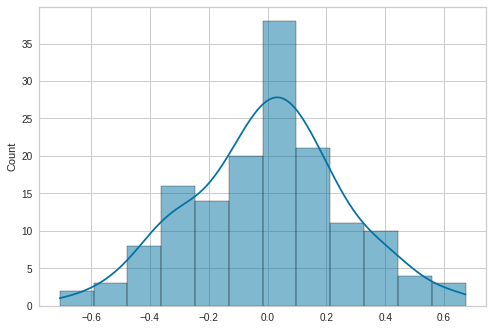

In [74]:
sns.histplot(modelo.resid,kde=True)

In [75]:
stats.shapiro(modelo.resid) # resíduos normais

ShapiroResult(statistic=0.9945798516273499, pvalue=0.8520032167434692)

In [76]:
# Visualizando apenas os coeficientes para a criação da reta de regressão
coeficientes = pd.DataFrame(modelo.params)
coeficientes.columns = ['Coeficientes']
print(coeficientes)

           Coeficientes
Intercept     -0.457522
x1             1.118177


In [69]:
import scipy as sp

<ipython-input-77-eacbda2ccaa8>:2: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  X_plot = sp.linspace(min(x1), max(x1), len(x1))


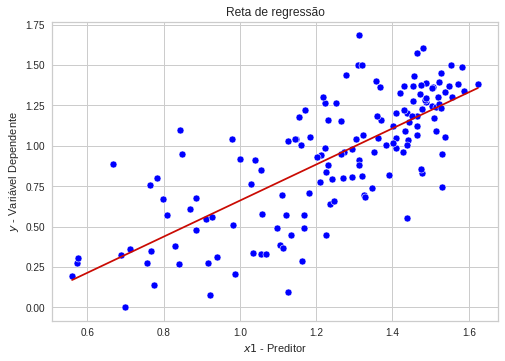

In [77]:
sns.scatterplot(y=y,x=x1,color='blue')
X_plot = sp.linspace(min(x1), max(x1), len(x1))
plt.plot(X_plot, X_plot*modelo.params[1] + modelo.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('$y$ - Variável Dependente')
plt.xlabel('$x1$ - Preditor')
plt.show()